In [42]:
import pandas as pd
import numpy as np

In [43]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [44]:
c = pd.read_csv("Cleavland.csv", names=col_names, na_values="?", sep=",")
h = pd.read_csv("hung.csv", names=col_names, na_values="?", sep=",")
s = pd.read_csv("Switzerland.csv", names=col_names, na_values="?", sep=",")

In [45]:
df_raw = pd.concat([c, h, s])
df_raw

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
119,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
120,72.0,1.0,3.0,160.0,0.0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
121,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


### Exploratory analysis

In [46]:
df_raw.shape

(720, 14)

In [47]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       720 non-null    float64
 1   sex       720 non-null    float64
 2   cp        720 non-null    float64
 3   trestbps  717 non-null    float64
 4   chol      697 non-null    float64
 5   fbs       637 non-null    float64
 6   restecg   718 non-null    float64
 7   thalach   718 non-null    float64
 8   exang     718 non-null    float64
 9   oldpeak   714 non-null    float64
 10  slope     513 non-null    float64
 11  ca        307 non-null    float64
 12  thal      400 non-null    float64
 13  target    720 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 84.4 KB


In [48]:
df_raw.isna().sum()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeak       6
slope       207
ca          413
thal        320
target        0
dtype: int64

In [49]:
for col in df_raw.columns:
    print(col, df_raw[col].unique())

age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 28. 30. 31. 32. 33. 36. 72. 73.]
sex [1. 0.]
cp [1. 4. 3. 2.]
trestbps [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190.  nan 113.  92.  95.
  80. 185.]
chol [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 

In [50]:
# replacing nan values 
df_raw['trestbps'].fillna(df_raw['trestbps'].mean(), inplace=True)
df_raw['chol'].fillna(df_raw['chol'].mean(), inplace=True)
df_raw['thalach'].fillna(df_raw['thalach'].mean(), inplace=True)
df_raw['oldpeak'].fillna(df_raw['oldpeak'].mean(), inplace=True)

In [51]:
df_raw['fbs'].fillna(df_raw['fbs'].mode()[0], inplace=True)
df_raw['ca'].fillna(df_raw['ca'].mode()[0], inplace=True)
df_raw['thal'].fillna(df_raw['thal'].mode()[0], inplace=True)
df_raw['slope'].fillna(df_raw['slope'].mode()[0], inplace=True)
df_raw['exang'].fillna(df_raw['exang'].mode()[0], inplace=True)
df_raw['restecg'].fillna(df_raw['restecg'].mode()[0], inplace=True)

In [52]:
df_raw.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Outlier detection and Removal

In [53]:
df_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df_raw.shape

(720, 14)

In [56]:
def plot_boxplot(df, ft):
    sns.boxplot(df[ft])
    plt.title(f'Box plot for {ft}')
    plt.show()

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


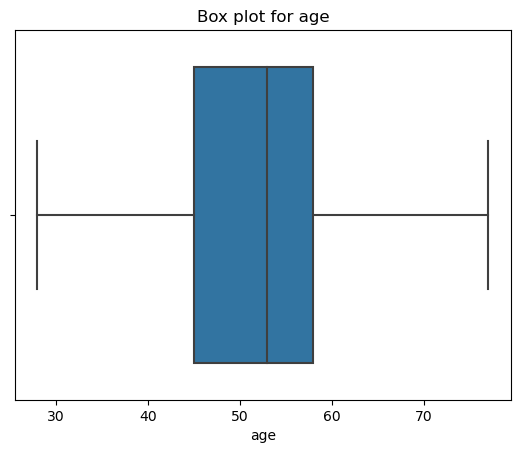

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


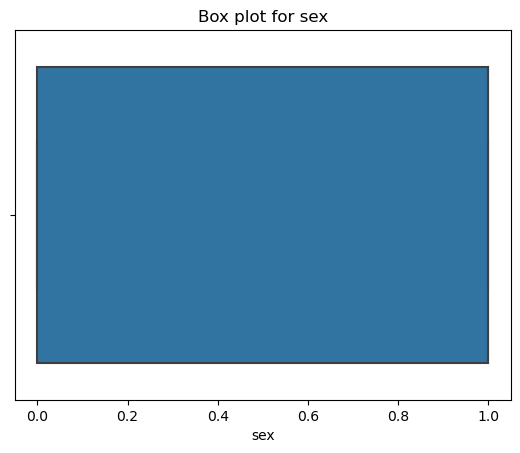

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


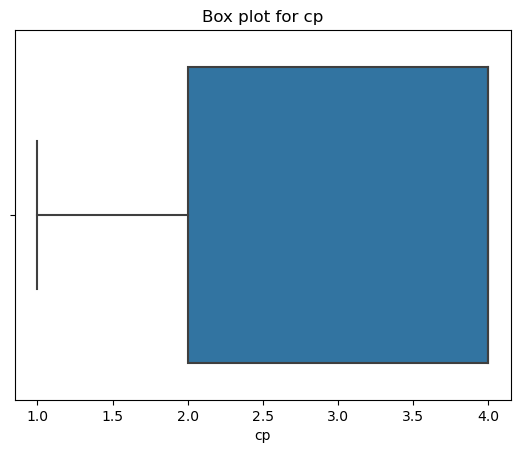

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


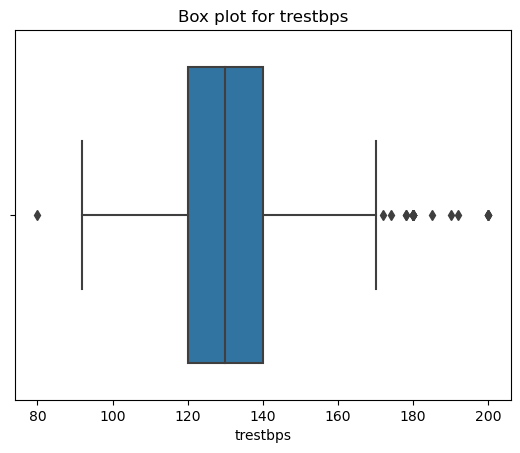

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


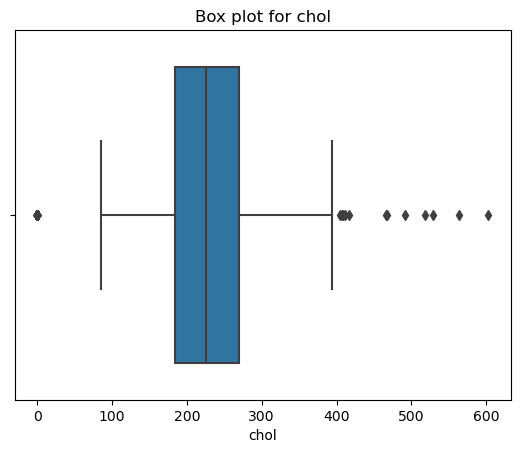

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


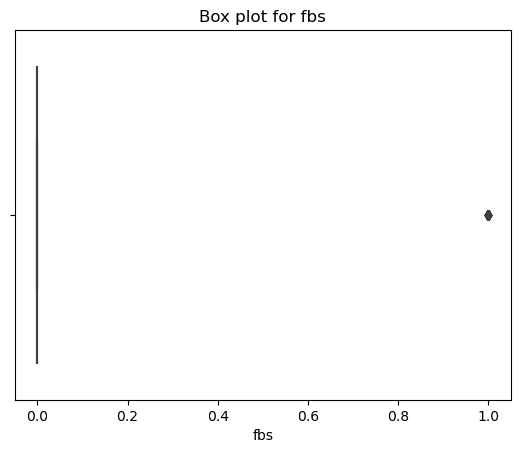

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


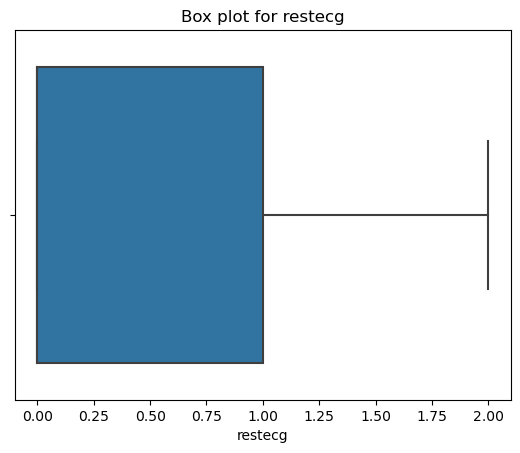

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


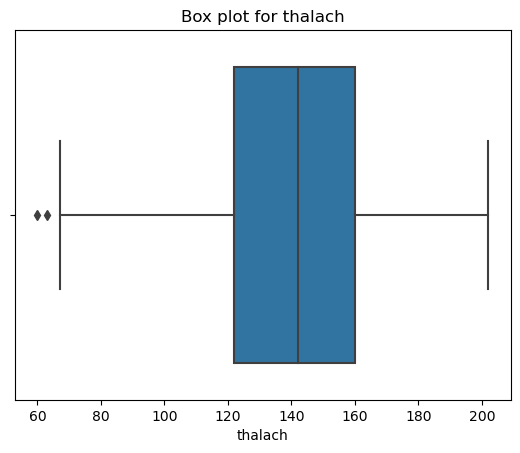

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


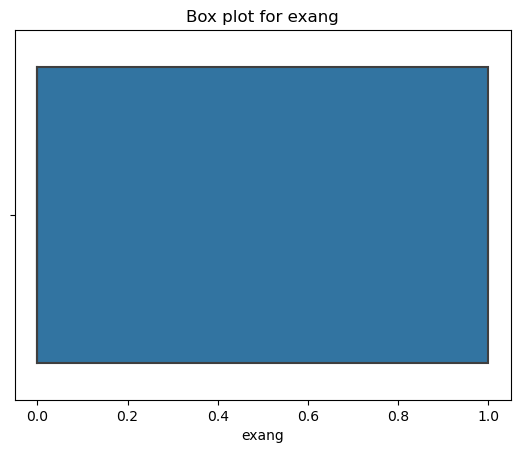

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


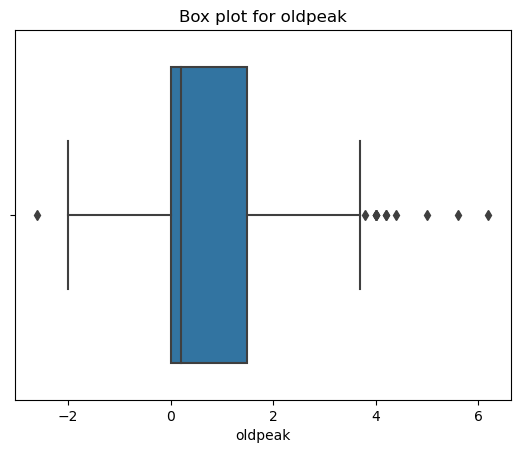

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


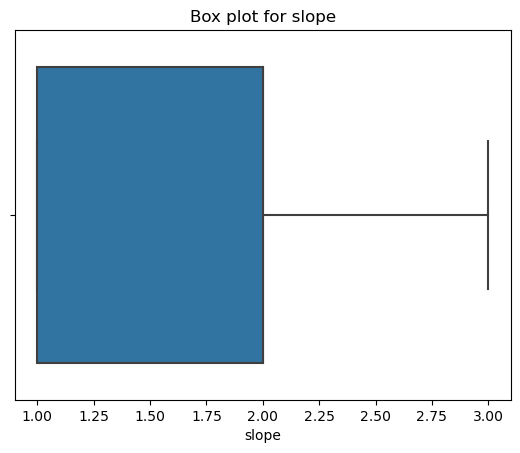

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


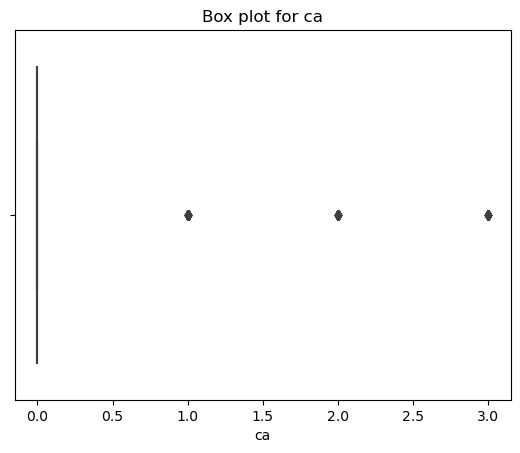

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


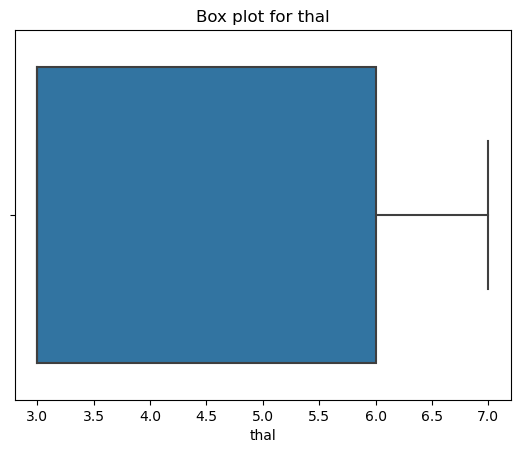

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


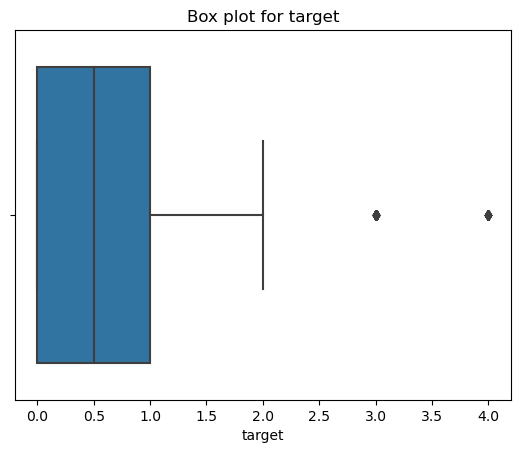

In [57]:
for col in df_raw.columns:
    plot_boxplot(df_raw, col)

In [58]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    # Calculate Inter quartile range IQR
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

    return ls


In [59]:
index_list = []

for feature in df_raw.columns:
    index_list.extend(outliers(df_raw, feature))

In [60]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [61]:
df = remove(df_raw, index_list)

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


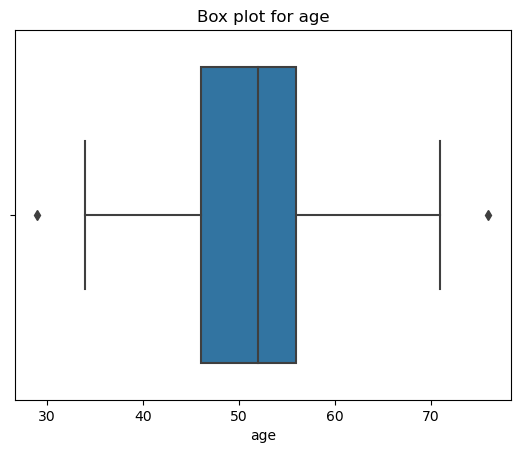

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


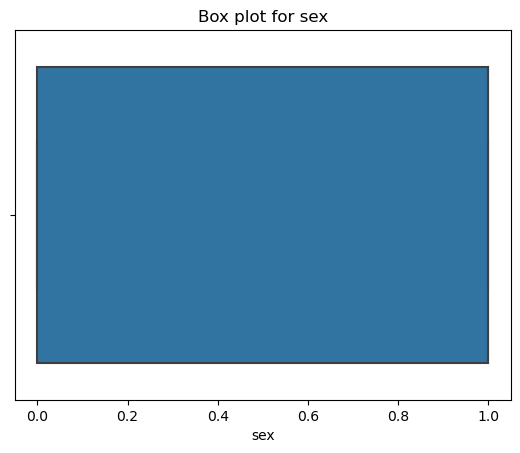

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


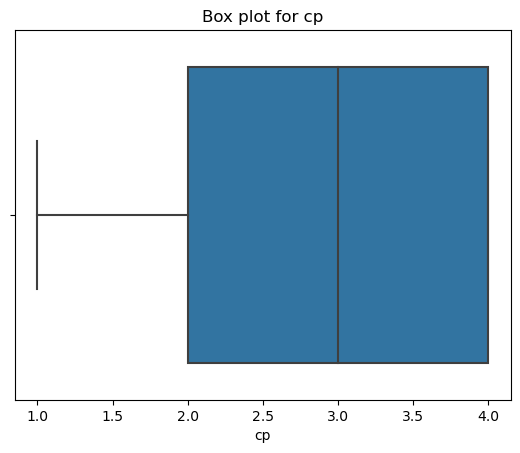

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


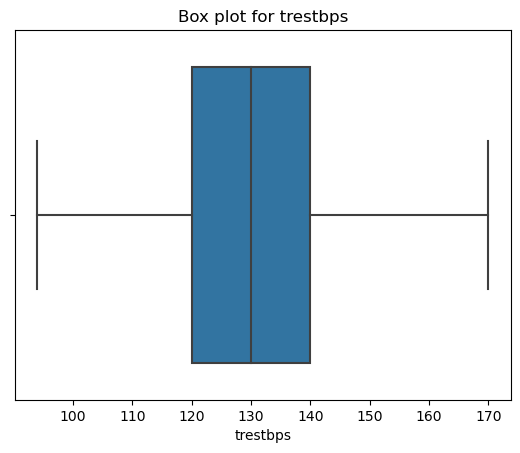

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


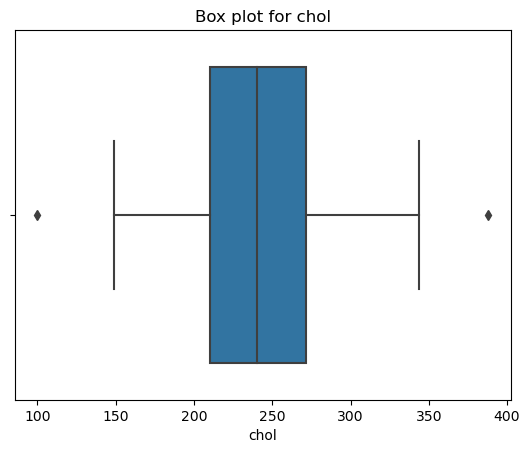

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


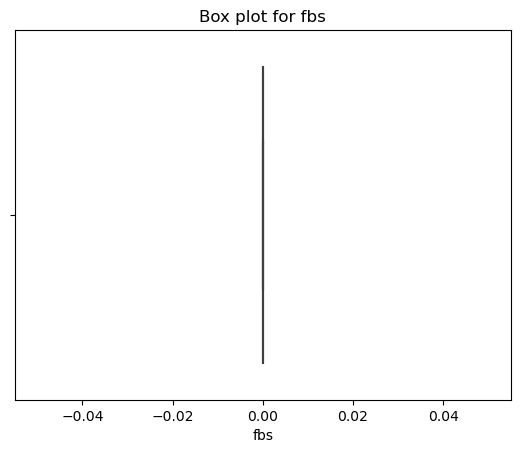

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


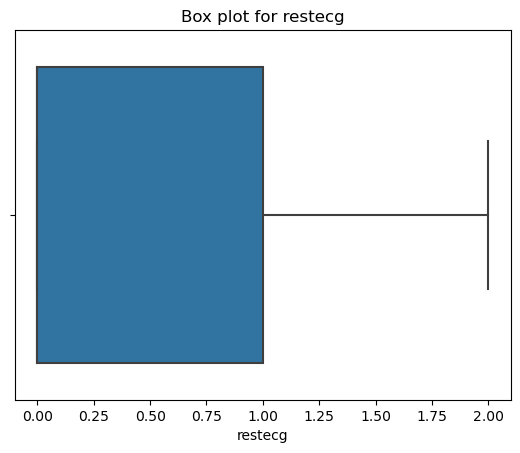

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


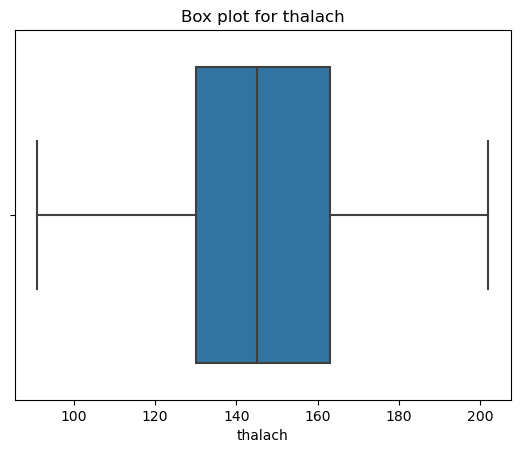

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


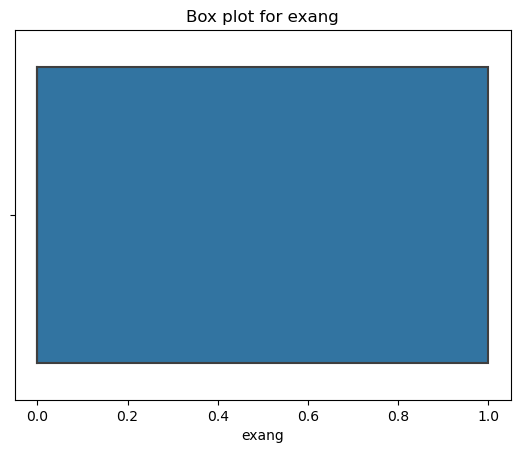

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


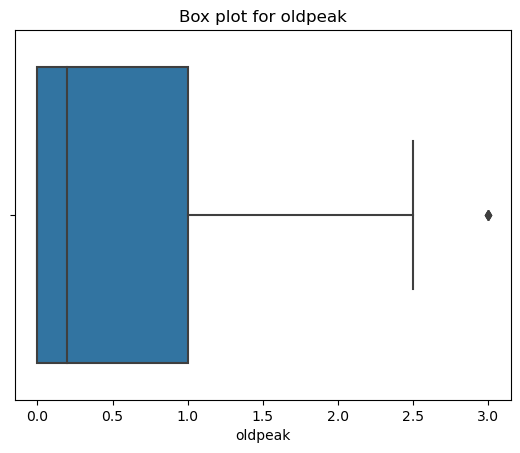

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


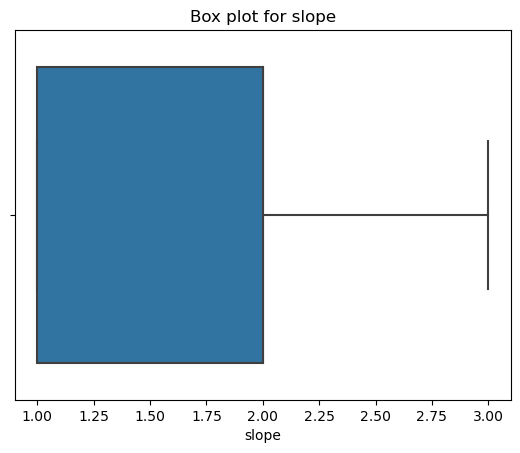

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


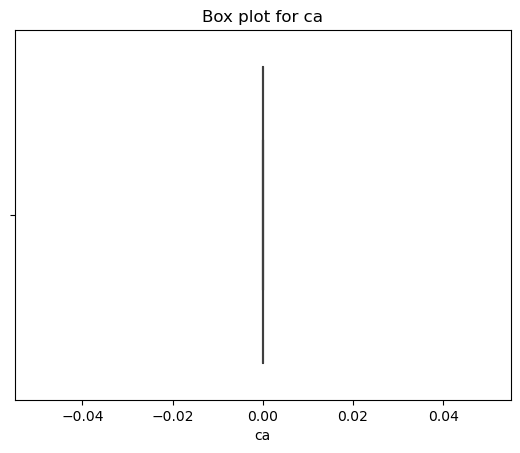

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


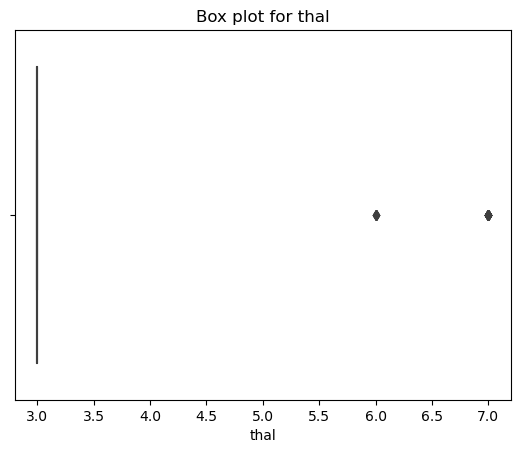

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


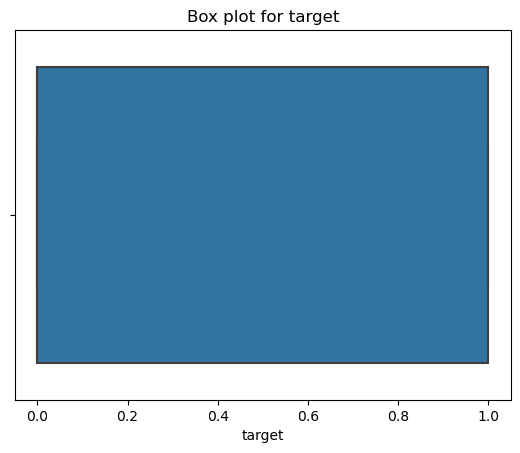

In [62]:
for col in df.columns:
    plot_boxplot(df, col)

In [63]:
df.shape

(139, 14)

In [64]:
def outliers2(data, threshold=3):
    zscore = ((data-data.mean())/data.std())
    out = zscore > 3
    data = data[~out.any(axis=1)]

    return data
df_cleaned = outliers2(df_raw)

In [65]:
df_cleaned.shape

(623, 14)

#### Visualization

#### Histogram
Objective: To visualize the distribution of a single continuous variable, such as age, education-num, capital-gain, or capital-loss. Histograms help us understand the underlying frequency distribution of the data and identify any patterns or outliers

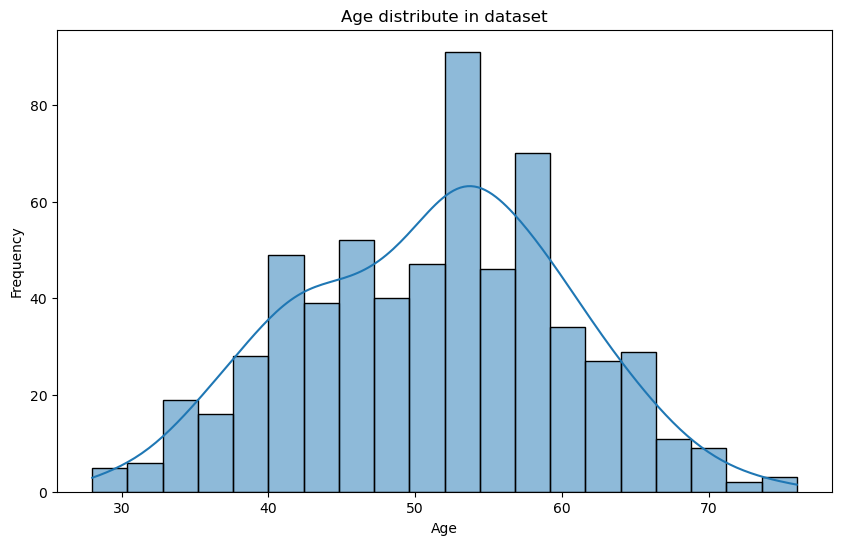

In [66]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['age'], bins=20, kde=True)
plt.title("Age distribute in dataset")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### Dot Plots:

Objective: Dot plots can be used to compare the values of a continuous variable across different categories. For example, you could create a dot plot showing the distribution of ages suffering from different types of chestpain. Dot plots help in visualizing the spread and central tendency of the data within each category.

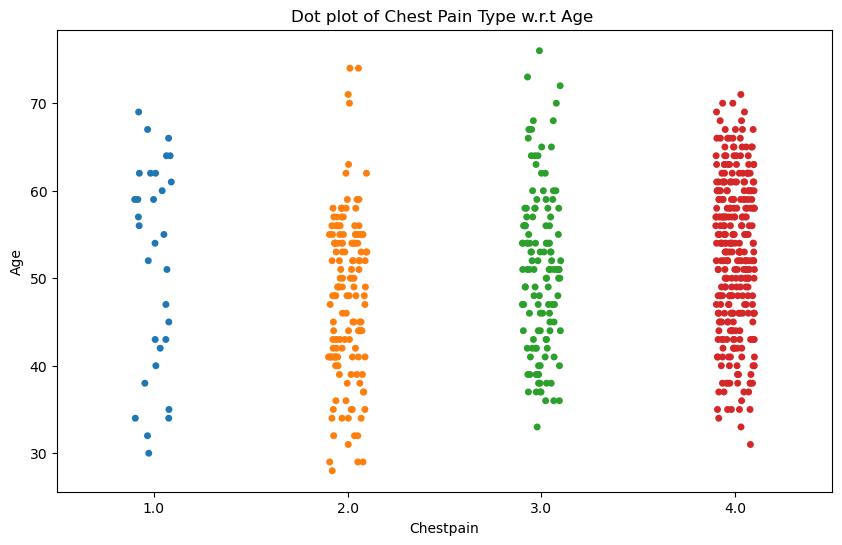

In [67]:
# Dot plot for checking 
# categorical values is x axis
plt.figure(figsize=(10, 6))
sns.stripplot(x='cp', y='age', data=df_cleaned, jitter=True)
plt.title("Dot plot of Chest Pain Type w.r.t Age ")
plt.xlabel("Chestpain")
plt.ylabel("Age")
plt.show()

#### Bar Plots:

Objective: Bar plots are useful for comparing the frequency or distribution of a categorical variable across different categories. Bar plots help in visualizing the distribution of categorical data and identifying any patterns or discrepancies.


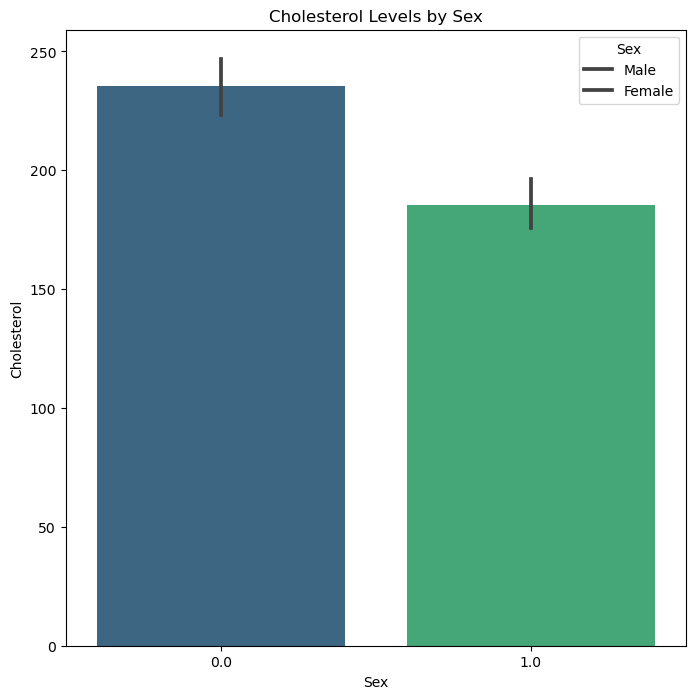

In [75]:
plt.figure(figsize=(8, 8))
sns.barplot(x="sex", y="chol", data=df_cleaned, palette="viridis")

# Add labels
plt.xlabel("Sex")
plt.ylabel("Cholesterol")
plt.title("Cholesterol Levels by Sex")


plt.show()

In [69]:
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,67.0,1.0,4.0,120.000000,229.0,0.0,2.0,129.00000,1.0,2.600000,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.000000,250.0,0.0,0.0,187.00000,0.0,3.500000,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.000000,204.0,0.0,2.0,172.00000,0.0,1.400000,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.000000,236.0,0.0,0.0,178.00000,0.0,0.800000,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.000000,268.0,0.0,2.0,160.00000,0.0,3.600000,3.0,2.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,69.0,1.0,4.0,131.804742,0.0,0.0,1.0,140.56546,0.0,0.789636,2.0,0.0,7.0,3
118,70.0,1.0,4.0,115.000000,0.0,0.0,1.0,92.00000,1.0,0.000000,2.0,0.0,7.0,1
120,72.0,1.0,3.0,160.000000,0.0,0.0,2.0,114.00000,0.0,1.600000,2.0,2.0,3.0,0
121,73.0,0.0,3.0,160.000000,0.0,0.0,1.0,121.00000,0.0,0.000000,1.0,0.0,3.0,1


### ScatterPlot

A scatter plot is a type of data visualization that displays the values of two variables as points on a two-dimensional plane, with one variable on the x-axis and the other variable on the y-axis. Each point represents an observation in the data set.


Scatter plots are useful for visualizing the relationship between two continuous variables. They can help identify patterns, trends, correlations, and outliers in the data. Here are a few key points about scatter plots:

<AxesSubplot:title={'center':'Age wise CP and Chol'}, xlabel='age', ylabel='cp'>

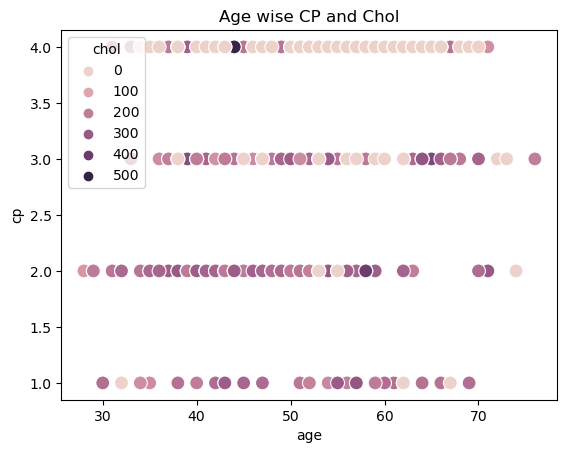

In [71]:
plt.title("Age wise CP and Chol")
# sns.scatterplot(df_cleaned.age, df_cleaned.cp, df_cleaned.chol, s=100)
sns.scatterplot(x='age', y='cp', hue='chol', data=df_cleaned, s=100)

- Relationship between Age and Chest Pain Type (CP):
Each point on the scatter plot represents an individual from the dataset.
The x-axis (horizontal axis) represents age, showing the age of each individual.
The y-axis (vertical axis) represents chest pain type (CP), which is a categorical variable.
By examining the distribution of points, you can observe if there's any relationship or pattern between age and chest pain type. For example, you might look for trends such as certain types of chest pain being more prevalent in certain age groups.
- Cholesterol Levels (Chol):
The size of each point (controlled by the parameter s=100) represents cholesterol levels (Chol) for the corresponding individual.
Larger points indicate higher cholesterol levels, while smaller points indicate lower cholesterol levels.
This additional dimension adds information about cholesterol levels to the scatter plot, allowing you to see if there's any correlation between age, chest pain type, and cholesterol levels.


### Pie Chart
Pie charts are useful for visualizing the proportion or percentage of categories within a categorical variable. In this dataset, we can create pie charts for binary categorical variables like "sex", "fbs", "exang", and "target" to show the distribution of positive and negative outcomes.


Text(0.5, 1.0, 'Sex Distribution')

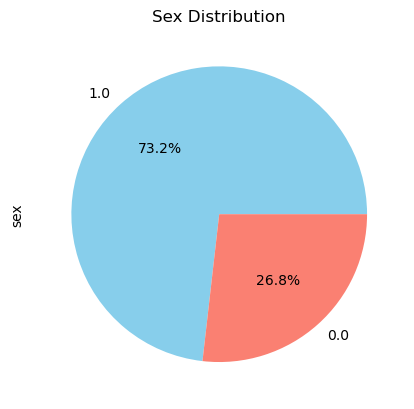

In [ ]:
df_cleaned['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Sex Distribution')


### Line chart
Objective: Line charts are typically used to visualize trends over continuous variables. In this dataset, we can create line charts for variables like "age", "trestbps" (resting blood pressure), "chol" (serum cholesterol), and "thalach" (maximum heart rate achieved).

Text(0.5, 1.0, 'Age vs Resting Blood Pressure')

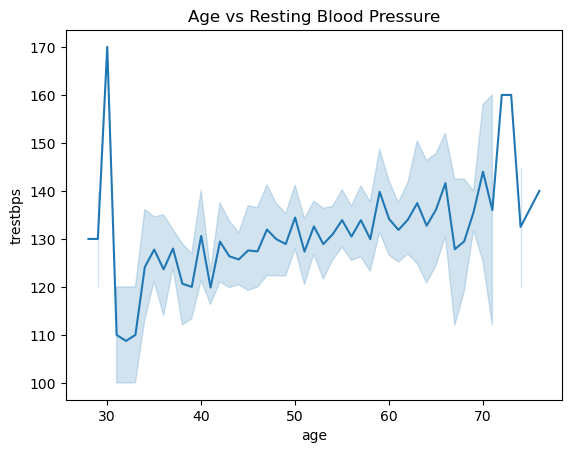

In [ ]:
df_cleaned.reset_index(drop=True, inplace=True)

sns.lineplot(x='age', y='trestbps', data=df_cleaned)
plt.title('Age vs Resting Blood Pressure')

<AxesSubplot:>

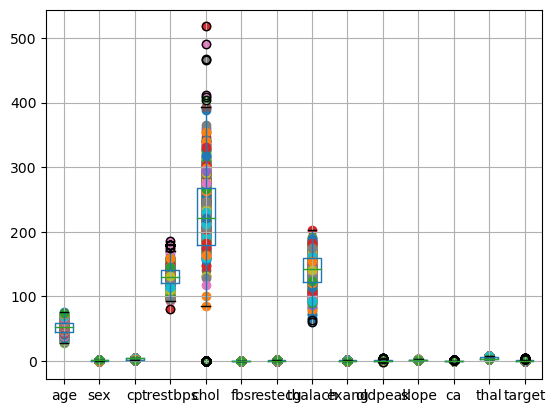

In [78]:
fig, ax = plt.subplots()
x=range(1, len(df_cleaned.columns)+1)
# loop thorugh rows
for i in range(df_cleaned.shape[0]):
    ax.scatter(x, df_cleaned.iloc[i])

df_cleaned.boxplot()
